Shape of the dataset: (50410, 8)
   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 n

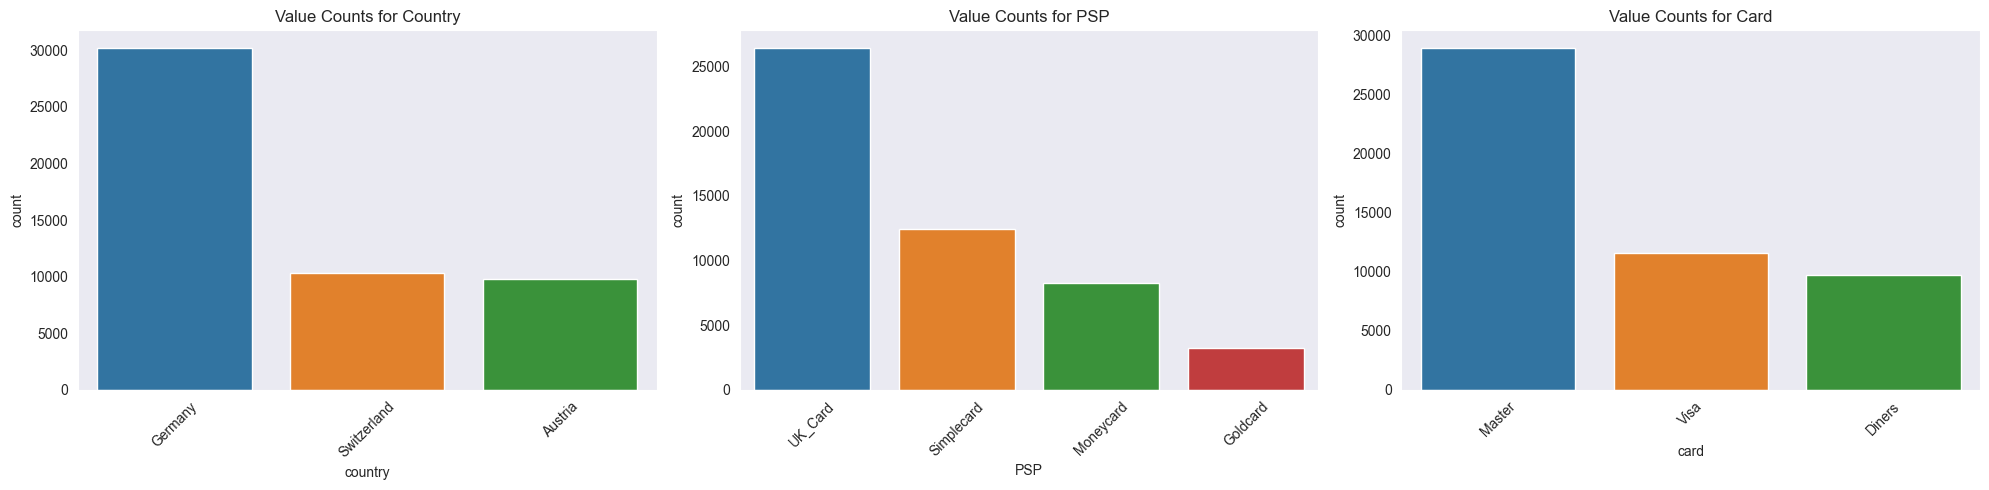

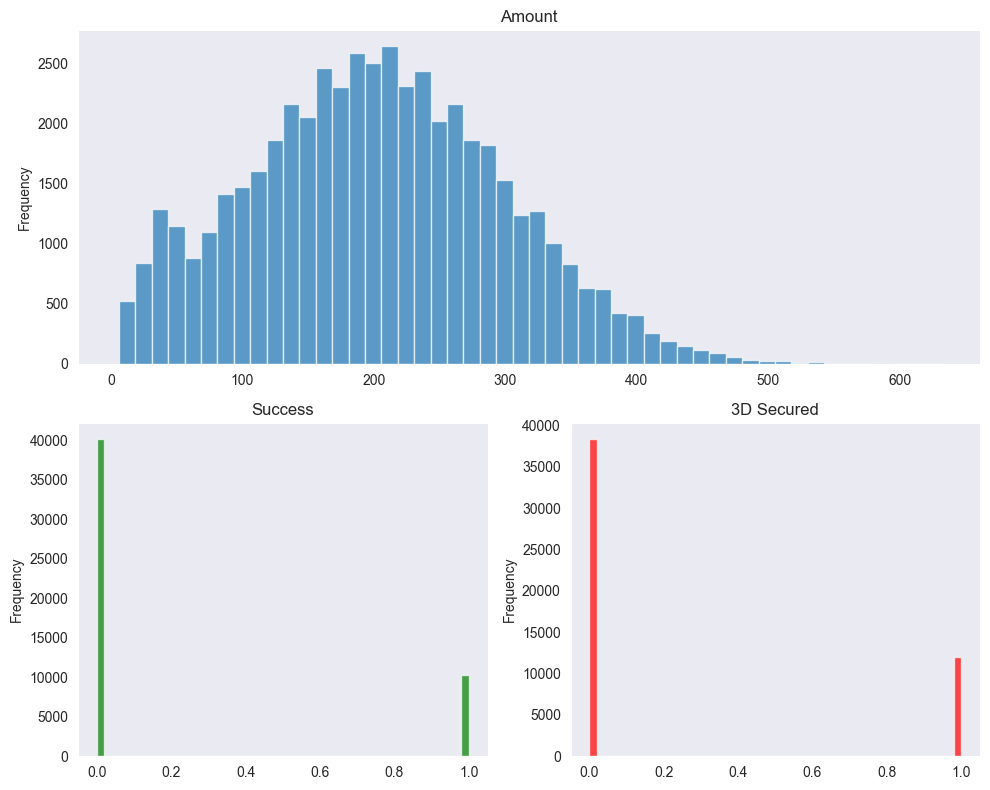

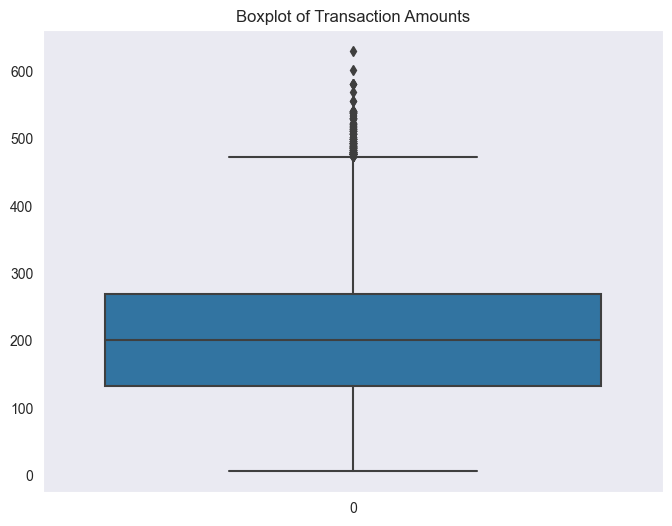

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a. Load the dataset
data = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

# b. High-level overview of structure and contents
print("Shape of the dataset:", data.shape)  # Displaying the shape
print(data.head())
print(data.info())

# c. Basic statistics for numerical columns
numerical_stats = data[["amount", "success", "3D_secured"]].describe()
print(numerical_stats)

# d. Basic statistics for categorical columns
categorical_stats = data[["country", "PSP", "card"]].describe(include="object")
print(categorical_stats)

# e. Value counts for categorical columns
sns.set_style("dark")

# Creating a single canvas with three subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plotting the 'country' bar chart on the first subplot
sns.countplot(
    data=data, x="country", order=data["country"].value_counts().index, ax=axes[0]
)
axes[0].set_title("Value Counts for Country")
axes[0].tick_params(axis="x", rotation=45)

# Plotting the 'PSP' bar chart on the second subplot
sns.countplot(data=data, x="PSP", order=data["PSP"].value_counts().index, ax=axes[1])
axes[1].set_title("Value Counts for PSP")
axes[1].tick_params(axis="x", rotation=45)

# Plotting the 'card' bar chart on the third subplot
sns.countplot(data=data, x="card", order=data["card"].value_counts().index, ax=axes[2])
axes[2].set_title("Value Counts for Card")
axes[2].tick_params(axis="x", rotation=45)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()

# f. Visualizing the distribution of numerical columns
sns.set_style("dark")

# Creating a grid of subplots
fig = plt.figure(figsize=(10, 8))

# Creating axes for 'amount' histogram that spans entire width at the top
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(data["amount"], bins=50, alpha=0.7)
ax1.set_title("Amount")
ax1.set_ylabel("Frequency")

# Creating axes for 'success' histogram on the bottom-left
ax2 = fig.add_subplot(2, 2, 3)
ax2.hist(data["success"], bins=50, color="green", alpha=0.7)
ax2.set_title("Success")
ax2.set_ylabel("Frequency")

# Creating axes for '3D_secured' histogram on the bottom-right
ax3 = fig.add_subplot(2, 2, 4)
ax3.hist(data["3D_secured"], bins=50, color="red", alpha=0.7)
ax3.set_title("3D Secured")
ax3.set_ylabel("Frequency")

# Adjusting the layout
plt.tight_layout()
plt.show()

# g. Identifying potential anomalies for 'amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(data["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()


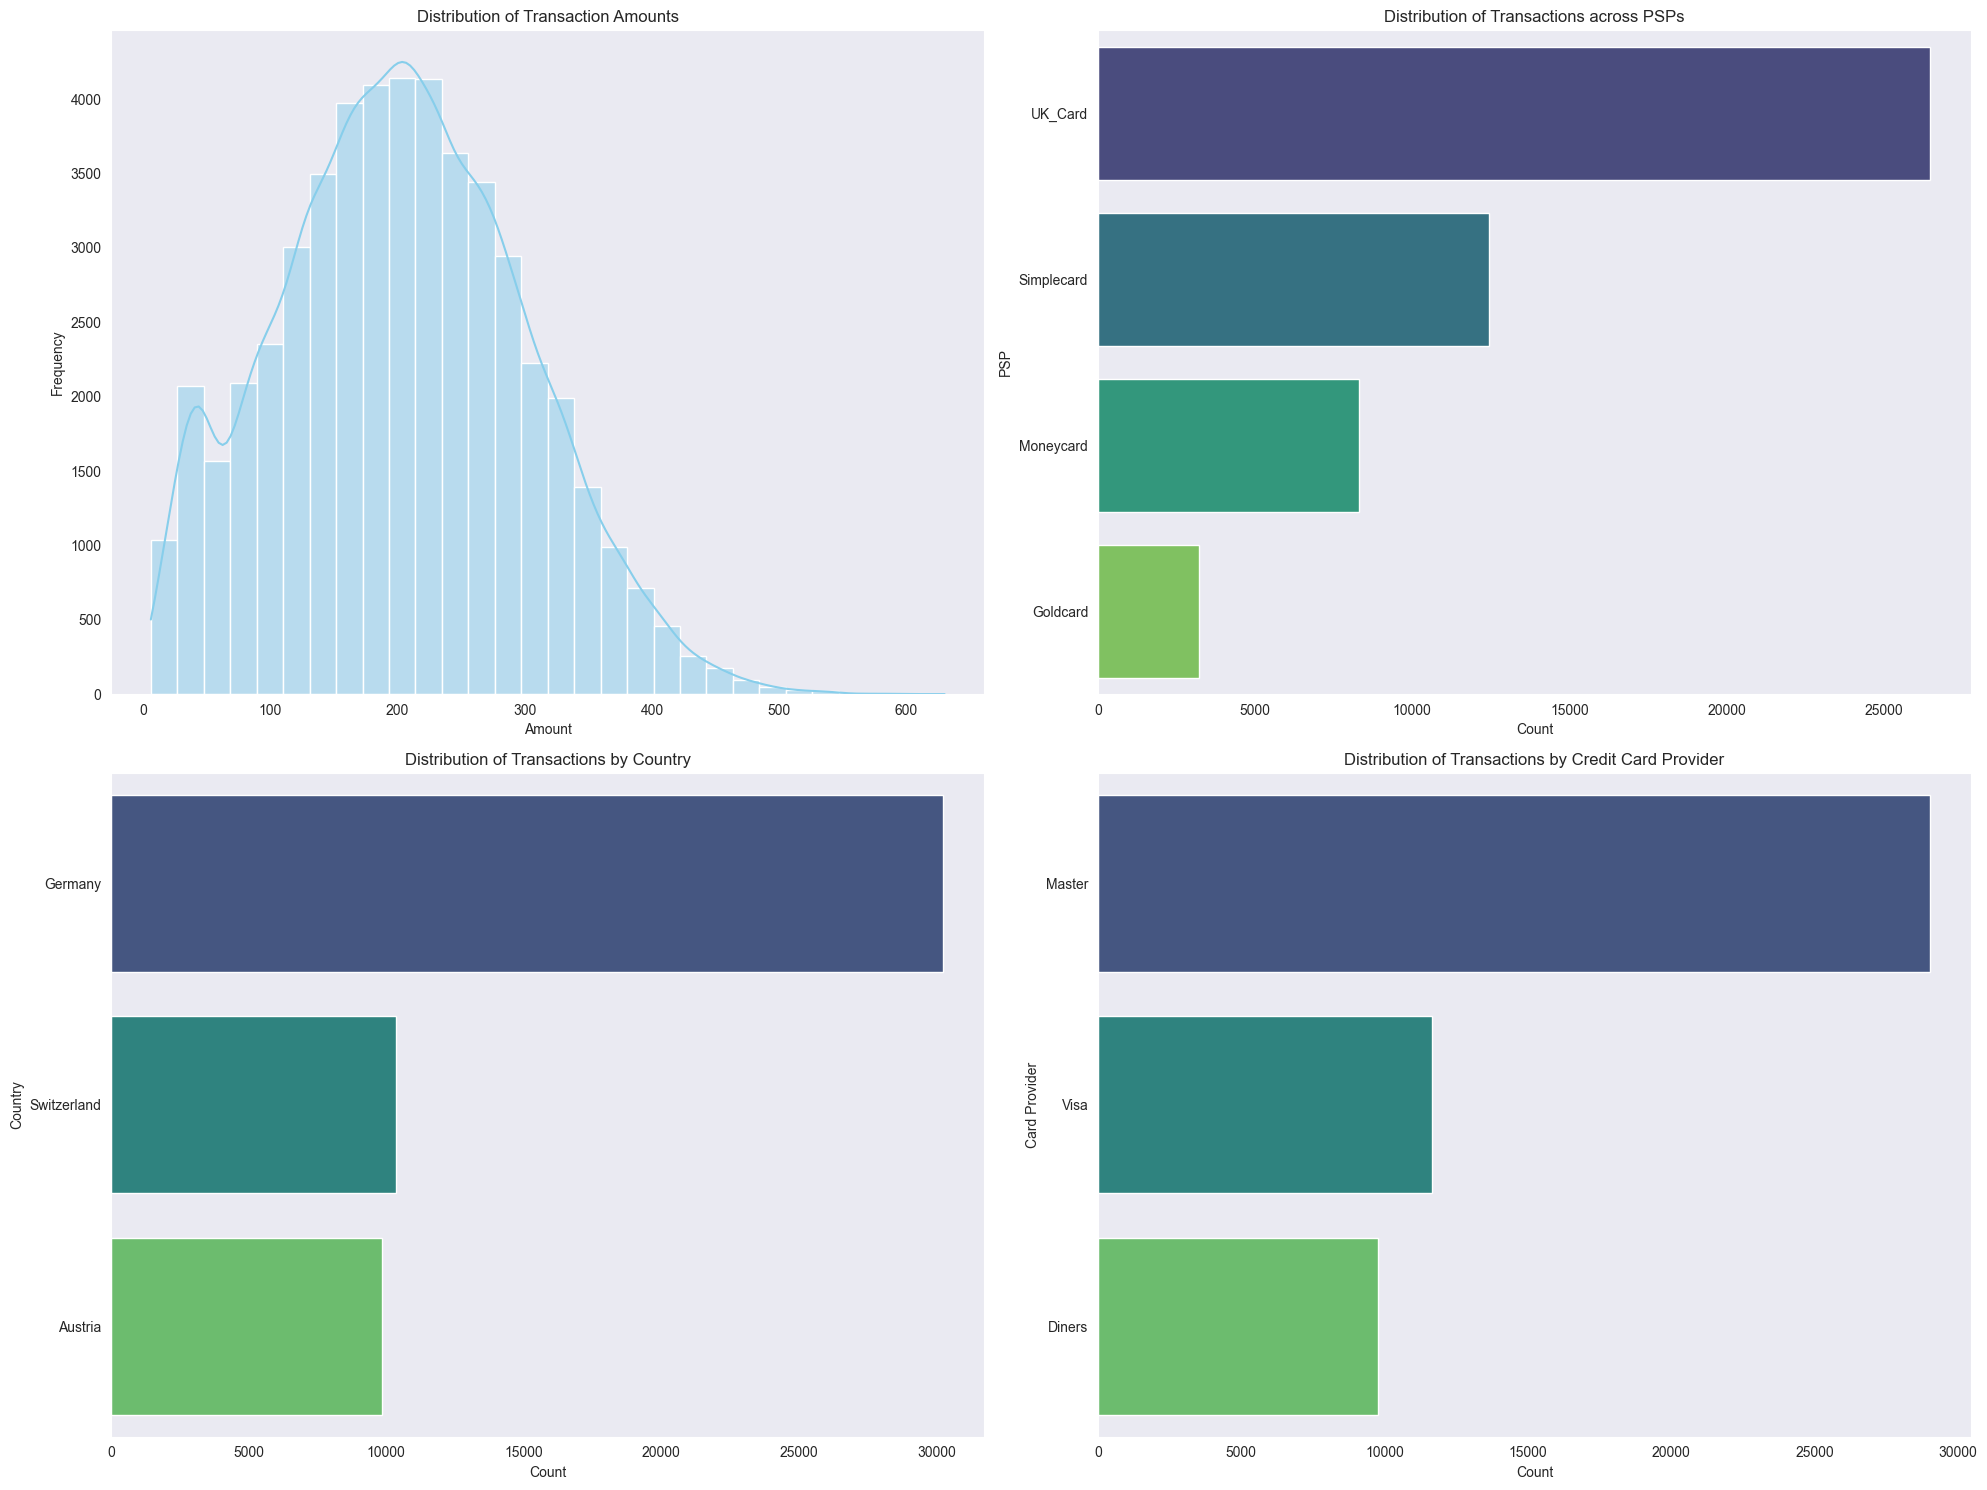

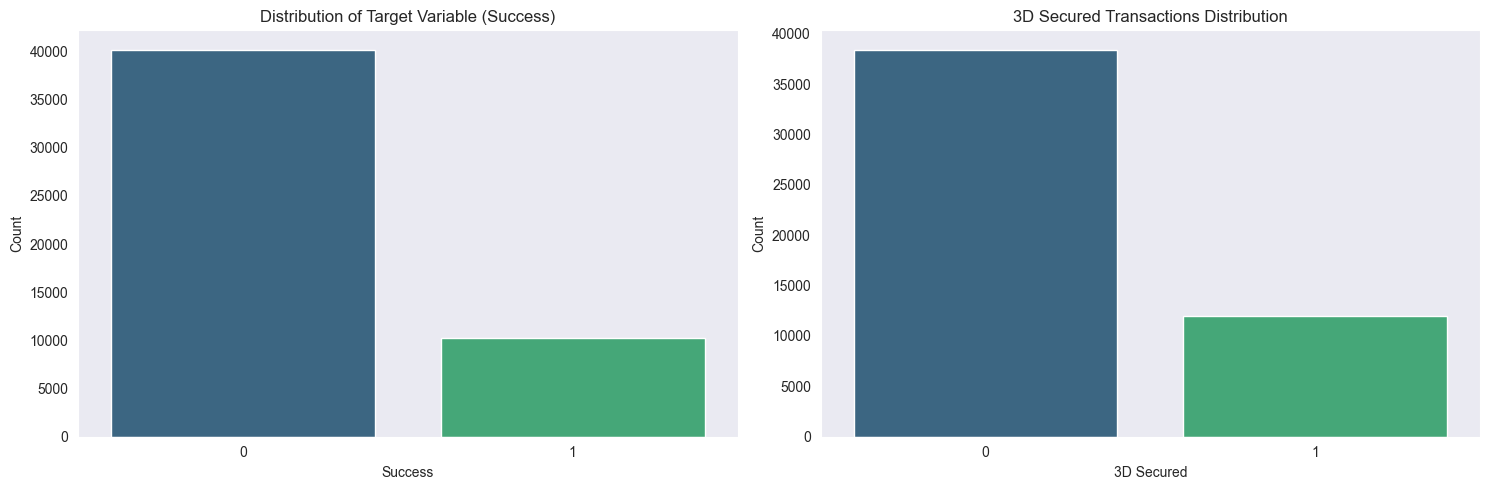

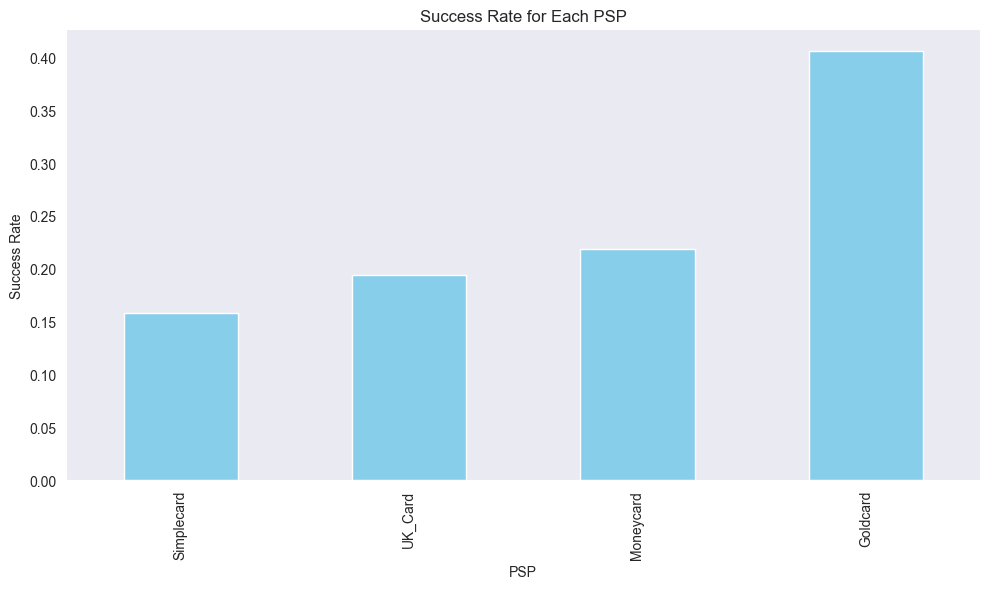

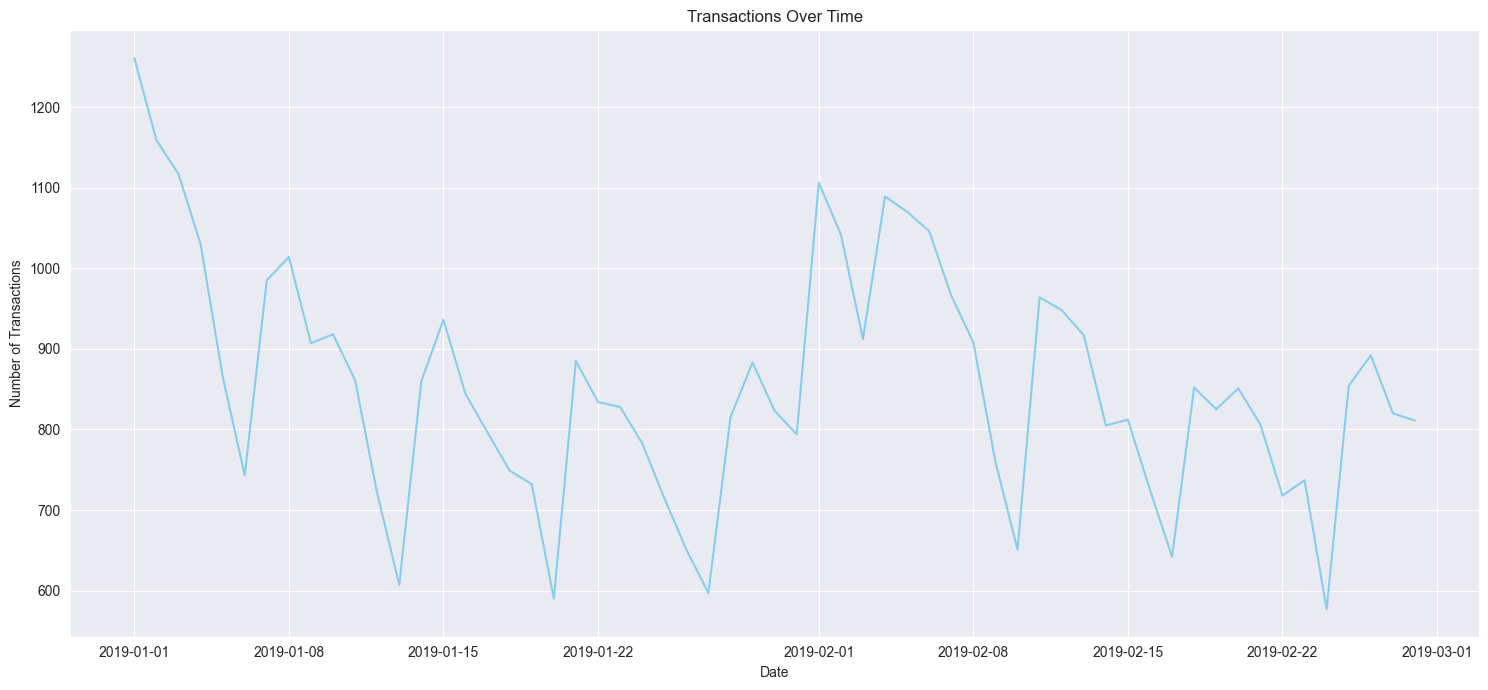

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel("PSP_Jan_Feb_2019.xlsx")
# Initialize the figure
plt.figure(figsize=(20, 15))

# Distribution of Transaction Amounts
plt.subplot(2, 2, 1)
sns.histplot(data["amount"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# Distribution of Transactions across PSPs
plt.subplot(2, 2, 2)
sns.countplot(y=data["PSP"], order=data["PSP"].value_counts().index, palette="viridis")
plt.title("Distribution of Transactions across PSPs")
plt.xlabel("Count")
plt.ylabel("PSP")

# Distribution of Transactions by Country
plt.subplot(2, 2, 3)
sns.countplot(
    y=data["country"], order=data["country"].value_counts().index, palette="viridis"
)
plt.title("Distribution of Transactions by Country")
plt.xlabel("Count")
plt.ylabel("Country")

# Distribution of Transactions by Credit Card Provider
plt.subplot(2, 2, 4)
sns.countplot(
    y=data["card"], order=data["card"].value_counts().index, palette="viridis"
)
plt.title("Distribution of Transactions by Credit Card Provider")
plt.xlabel("Count")
plt.ylabel("Card Provider")

plt.tight_layout()
plt.show()


# Initialize the figure
plt.figure(figsize=(15, 5))

# Distribution of Target Variable (Success)
plt.subplot(1, 2, 1)
sns.countplot(x=data["success"], palette="viridis")
plt.title("Distribution of Target Variable (Success)")
plt.xlabel("Success")
plt.ylabel("Count")

# 3D Secured Transactions Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=data["3D_secured"], palette="viridis")
plt.title("3D Secured Transactions Distribution")
plt.xlabel("3D Secured")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Calculate the success rate for each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()

# Plotting the success rate for each PSP
plt.figure(figsize=(10, 6))
psp_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each PSP")
plt.xlabel("PSP")
plt.ylabel("Success Rate")
plt.tight_layout()
plt.show()


# Convert the 'tmsp' column to datetime format
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Group by date and count the number of transactions for each day
daily_transactions = data.groupby(data["tmsp"].dt.date).size()

# Plotting transactions over time
plt.figure(figsize=(15, 7))
daily_transactions.plot(color="skyblue")
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Drop the unnecessary first column
data.drop(columns=["Unnamed: 0"], inplace=True)

# 1. Handle Missing or Erroneous Data
# Confirming no missing values
missing_values_check = data.isnull().sum()

# 2. Address Potential Outliers
# Checking for outliers in the 'amount' column using the IQR method
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
percentage_outliers = len(outliers) / len(data) * 100

print("Missing Values Check:\n", missing_values_check)
print("\nProcessed Data (First 5 Rows):\n", data.head())
print("\nPercentage of Transactions Considered Outliers:", percentage_outliers, "%")

Missing Values Check:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

Processed Data (First 5 Rows):
                  tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  
0    Visa  
1    Visa  
2  Diners  
3  Diners  
4  Diners  

Percentage of Transactions Considered Outliers: 0.30351120809363225 %


In [6]:
data.head()


,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [7]:
# Convert 'tmsp' column to datetime format
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Extract hour, day, and day of the week from 'tmsp' column
data["hour"] = data["tmsp"].dt.hour
data["day"] = data["tmsp"].dt.day
data["day_of_week"] = data["tmsp"].dt.dayofweek  # Monday=0, Sunday=6
bins = [0, 6, 12, 18, 24]
labels = ["Night", "Morning", "Afternoon", "Evening"]
data["time_of_day"] = pd.cut(data["hour"], bins=bins, labels=labels, right=False)

In [11]:
# Sort the data by 'country', 'amount', and 'tmsp' to align potential repeated attempts sequentially
data = data.sort_values(by=["country", "amount", "tmsp"])

# Create a column 'time_diff' to calculate the time difference between consecutive transactions
data["time_diff"] = (
    data.groupby(["country", "amount"])["tmsp"].diff().dt.total_seconds()
)

# Binary feature to indicate if a transaction is a repeated attempt (within 60 seconds)
data["multiple_attempts"] = (data["time_diff"] <= 60).astype(int)

# Calculate retry count
data["retry_count"] = data.groupby(["country", "amount"])["multiple_attempts"].cumsum()

In [14]:
# 1. Calculate the historical success rate of each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()
data["psp_success_rate"] = data["PSP"].map(psp_success_rate)

# 2. Calculate the success rate of transactions by card type
card_success_rate = data.groupby("card")["success"].mean()
data["card_success_rate"] = data["card"].map(card_success_rate)

# 3. Calculate the success rate of transactions that are 3D secured versus those that are not
secured_success_rate = data.groupby("3D_secured")["success"].mean()
data["secured_success_rate"] = data["3D_secured"].map(secured_success_rate)

In [ ]:
# First, determine the quantiles of the 'amount' to decide on the bin edges
quantiles = data["amount"].quantile([0.25, 0.5, 0.75])

# Binning the 'amount' column based on the quantiles
bin_edges = [0] + list(quantiles) + [data["amount"].max() + 1]
bin_labels = ["Q1", "Q2", "Q3", "Q4"]
data["amount_bin"] = pd.cut(
    data["amount"], bins=bin_edges, labels=bin_labels, right=False
)

In [16]:
# First, determine the quantiles of the 'amount' to decide on the bin edges
quantiles = data["amount"].quantile([0.25, 0.5, 0.75])

# Binning the 'amount' column based on the quantiles
bin_edges = [0] + list(quantiles) + [data["amount"].max() + 1]
bin_labels = ["Low", "Medium", "High", "Very High"]
data["amount_bin"] = pd.cut(
    data["amount"], bins=bin_edges, labels=bin_labels, right=False
)

In [18]:
# Create an interaction feature between 'country' and 'PSP'
data["country_PSP_interaction"] = data["country"] + "_" + data["PSP"]

In [19]:
pd.set_option("display.max_columns", 50)

data.head(50)

,tmsp,country,amount,success,PSP,3D_secured,card,hour,day,day_of_week,time_of_day,time_diff,multiple_attempts,retry_count,psp_success_rate,card_success_rate,secured_success_rate,amount_bin,country_PSP_interaction
9238,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,3,10,3,Night,NaN,0,0,0.218754,0.222973,0.189562,Low,Austria_Moneycard
9239,2019-01-10 03:49:37,Austria,6,0,Simplecard,0,Diners,3,10,3,Night,25.0,1,1,0.158123,0.222973,0.189562,Low,Austria_Simplecard
22742,2019-01-27 14:01:11,Austria,6,1,Simplecard,0,Master,14,27,6,Afternoon,1505494.0,0,1,0.158123,0.193883,0.189562,Low,Austria_Simplecard
33737,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,5,8,4,Night,1004482.0,0,1,0.194338,0.222973,0.189562,Low,Austria_UK_Card
33738,2019-02-08 05:02:37,Austria,6,0,UK_Card,0,Diners,5,8,4,Night,4.0,1,2,0.194338,0.222973,0.189562,Low,Austria_UK_Card
33739,2019-02-08 05:02:39,Austria,6,0,Simplecard,0,Diners,5,8,4,Night,2.0,1,3,0.158123,0.222973,0.189562,Low,Austria_Simplecard
40539,2019-02-16 08:24:40,Austria,6,1,UK_Card,1,Master,8,16,5,Morning,703321.0,0,3,0.194338,0.193883,0.245525,Low,Austria_UK_Card
21179,2019-01-25 04:18:26,Austria,7,0,Moneycard,0,Master,4,25,4,Night,NaN,0,0,0.218754,0.193883,0.189562,Low,Austria_Moneycard
23798,2019-01-28 23:48:19,Austria,7,0,UK_Card,0,Master,23,28,0,Evening,329393.0,0,0,0.194338,0.193883,0.189562,Low,Austria_UK_Card
31712,2019-02-06 04:09:05,Austria,7,0,UK_Card,0,Diners,4,6,2,Night,706846.0,0,0,0.194338,0.222973,0.189562,Low,Austria_UK_Card


In [ ]:
file = "post_feature_engineering_analysis.csv"
data.to_csv(file, index=False)


In [ ]:
# Dropping redundant columns
columns_to_drop = ["country_PSP_interaction", "card_PSP_interaction", "time_diff"]

# Dropping the columns from the dataframe
post_fe_df_cleaned = data.drop(columns=columns_to_drop, errors="ignore")

# Check for features with low variance
low_variance_features = post_fe_df_cleaned.var()[
    post_fe_df_cleaned.var() < 0.01
].index.tolist()

# Add low variance features to the columns to drop list
columns_to_drop.extend(low_variance_features)

# Dropping low variance features
post_fe_df_cleaned = post_fe_df_cleaned.drop(
    columns=low_variance_features, errors="ignore"
)

# Identifying highly correlated features
corr_matrix = post_fe_df_cleaned.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)
]

# Add highly correlated features to the columns to drop list
columns_to_drop.extend(high_corr_features)

# Dropping highly correlated features
post_fe_df_cleaned = post_fe_df_cleaned.drop(
    columns=high_corr_features, errors="ignore"
)

columns_to_drop


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Adjusting the features and target variable for training, validation, and testing datasets
X_train = train_data_encoded.drop(columns=["PSP"])
y_train = train_data_encoded["PSP"]

X_valid = valid_data_encoded.drop(columns=["PSP"])
y_valid = valid_data_encoded["PSP"]

X_test = test_data_encoded.drop(columns=["PSP"])
y_test = test_data_encoded["PSP"]

# Initializing the Logistic Regression model for multi-class classification
logreg_psp = LogisticRegression(max_iter=1000, random_state=42, multi_class="ovr")

# Fitting the model on the training data
logreg_psp.fit(X_train, y_train)

# Predicting on the validation set
y_valid_pred_psp = logreg_psp.predict(X_valid)

# Calculating accuracy and other metrics for the validation set
accuracy_psp = accuracy_score(y_valid, y_valid_pred_psp)
classification_rep_psp = classification_report(y_valid, y_valid_pred_psp)

accuracy_psp, classification_rep_psp


In [ ]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to our data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the new class distribution after SMOTE
class_distribution_resampled = y_train_resampled.value_counts()

print(class_distribution_resampled)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions on validation data
valid_predictions = log_reg.predict(X_valid)

# Evaluating the model's performance
accuracy = accuracy_score(y_valid, valid_predictions)
classification_rep = classification_report(y_valid, valid_predictions)

print("Accuracy on validation data:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the datasets
train_data = pd.read_csv("train_data_encoded.csv")
valid_data = pd.read_csv("valid_data_encoded.csv")

# Fees for the PSPs
fees = {"Moneycard": 5, "Goldcard": 10, "UK_Card": 3, "Simplecard": 1}

# Train the RandomForest model
X_train = train_data.drop(["PSP", "success"], axis=1)
y_train = train_data["PSP"]

model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities on validation data
X_valid = valid_data.drop(["PSP", "success"], axis=1)
probabilities = model.predict_proba(X_valid)

# Implement prediction logic
predicted_PSP_valid = []
for idx, prob in enumerate(probabilities):
    predicted_psp_idx = prob.argmax()
    actual_psp = valid_data["PSP"].iloc[idx]

    if (
        valid_data["success"].iloc[idx] == 1
        and model.classes_[predicted_psp_idx] == actual_psp
    ):
        predicted_PSP_valid.append(actual_psp)
    elif (
        valid_data["success"].iloc[idx] == 0
        and model.classes_[predicted_psp_idx] == actual_psp
    ):
        prob[predicted_psp_idx] = -1
        next_best_psp_idx = prob.argmax()
        if (
            prob[next_best_psp_idx] == max(prob)
            and len([p for p in prob if p == prob[next_best_psp_idx]]) > 1
        ):
            candidates = [
                model.classes_[i]
                for i, p in enumerate(prob)
                if p == prob[next_best_psp_idx]
            ]
            next_best_psp = min(candidates, key=lambda x: fees[x])
        else:
            next_best_psp = model.classes_[next_best_psp_idx]
        predicted_PSP_valid.append(next_best_psp)
    else:
        predicted_PSP_valid.append(model.classes_[predicted_psp_idx])

# Evaluate the model
accuracy = accuracy_score(valid_data["PSP"], predicted_PSP_valid)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.08351063829787234


In [5]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to our data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the new class distribution after SMOTE
class_distribution_resampled = y_train_resampled.value_counts()

print(class_distribution_resampled)


UK_Card       23826
Simplecard    23826
Moneycard     23826
Goldcard      23826
Name: PSP, dtype: int64


In [6]:
model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on validation data
X_valid = valid_data.drop(["PSP", "success"], axis=1)
probabilities = model.predict_proba(X_valid)

# Implement prediction logic
predicted_PSP_valid = []
for idx, prob in enumerate(probabilities):
    predicted_psp_idx = prob.argmax()
    actual_psp = valid_data["PSP"].iloc[idx]

    if (
        valid_data["success"].iloc[idx] == 1
        and model.classes_[predicted_psp_idx] == actual_psp
    ):
        predicted_PSP_valid.append(actual_psp)
    elif (
        valid_data["success"].iloc[idx] == 0
        and model.classes_[predicted_psp_idx] == actual_psp
    ):
        prob[predicted_psp_idx] = -1
        next_best_psp_idx = prob.argmax()
        if (
            prob[next_best_psp_idx] == max(prob)
            and len([p for p in prob if p == prob[next_best_psp_idx]]) > 1
        ):
            candidates = [
                model.classes_[i]
                for i, p in enumerate(prob)
                if p == prob[next_best_psp_idx]
            ]
            next_best_psp = min(candidates, key=lambda x: fees[x])
        else:
            next_best_psp = model.classes_[next_best_psp_idx]
        predicted_PSP_valid.append(next_best_psp)
    else:
        predicted_PSP_valid.append(model.classes_[predicted_psp_idx])

# Evaluate the model
accuracy = accuracy_score(valid_data["PSP"], predicted_PSP_valid)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.06622340425531915


In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_data = pd.read_csv("train_data_encoded.csv")
valid_data = pd.read_csv("valid_data_encoded.csv")

# Fees for the PSPs
fees = {"Moneycard": 5, "Goldcard": 10, "UK_Card": 3, "Simplecard": 1}

# Encode PSP names to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data["PSP"])

# Split data into features and target
X_train = train_data.drop(["PSP", "success"], axis=1)
X_valid = valid_data.drop(["PSP", "success"], axis=1)

# Train with XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05)
xgb_model.fit(X_train, y_train_encoded)

# Train with LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=300, max_depth=5, learning_rate=0.05)
lgb_model.fit(X_train, y_train_encoded)


# Function to get predictions based on the logic provided
def get_predictions(model, X, actual_psp, actual_success):
    probabilities = model.predict_proba(X)
    predicted_PSP = []
    for idx, prob in enumerate(probabilities):
        predicted_psp_idx = prob.argmax()
        predicted_psp_name = label_encoder.inverse_transform([predicted_psp_idx])[0]

        if actual_success.iloc[idx] == 1 and predicted_psp_name == actual_psp.iloc[idx]:
            predicted_PSP.append(actual_psp.iloc[idx])
        elif (
            actual_success.iloc[idx] == 0 and predicted_psp_name == actual_psp.iloc[idx]
        ):
            prob[predicted_psp_idx] = -1
            next_best_psp_idx = prob.argmax()
            next_best_psp_name = label_encoder.inverse_transform([next_best_psp_idx])[0]

            if (
                prob[next_best_psp_idx] == max(prob)
                and len([p for p in prob if p == prob[next_best_psp_idx]]) > 1
            ):
                candidates = [
                    label_encoder.inverse_transform([i])[0]
                    for i, p in enumerate(prob)
                    if p == prob[next_best_psp_idx]
                ]
                next_best_psp = min(candidates, key=lambda x: fees[x])
            else:
                next_best_psp = next_best_psp_name
            predicted_PSP.append(next_best_psp)
        else:
            predicted_PSP.append(predicted_psp_name)
    return predicted_PSP


# Get predictions for both models
xgb_predictions = get_predictions(
    xgb_model, X_valid, valid_data["PSP"], valid_data["success"]
)
lgb_predictions = get_predictions(
    lgb_model, X_valid, valid_data["PSP"], valid_data["success"]
)

# Evaluate both models
xgb_accuracy = accuracy_score(valid_data["PSP"], xgb_predictions)
lgb_accuracy = accuracy_score(valid_data["PSP"], lgb_predictions)

print("XGBoost Validation Accuracy:", xgb_accuracy)
print("LightGBM Validation Accuracy:", lgb_accuracy)

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming you already have the models trained and predictions generated
# xgb_predictions and lgb_predictions from the previous code


def financial_impact(predictions, actual_psp, success, fees):
    impact = 0
    for pred, act, suc in zip(predictions, actual_psp, success):
        # If the prediction is correct and the transaction is successful
        if pred == act and suc == 1:
            impact -= fees[pred]  # Successful transaction cost
        # If the prediction is incorrect but the transaction is successful
        elif pred != act and suc == 1:
            impact -= fees[act]  # Actual PSP fee
        # If the transaction is not successful
        elif suc == 0:
            impact -= fees[act]  # Fee for the failed transaction
    return impact


# Metrics for XGBoost
xgb_precision = precision_score(valid_data["PSP"], xgb_predictions, average="weighted")
xgb_recall = recall_score(valid_data["PSP"], xgb_predictions, average="weighted")
xgb_f1 = f1_score(valid_data["PSP"], xgb_predictions, average="weighted")
xgb_confusion = confusion_matrix(valid_data["PSP"], xgb_predictions)
xgb_financial_impact = financial_impact(
    xgb_predictions, valid_data["PSP"], valid_data["success"], fees
)

# Metrics for LightGBM
lgb_precision = precision_score(valid_data["PSP"], lgb_predictions, average="weighted")
lgb_recall = recall_score(valid_data["PSP"], lgb_predictions, average="weighted")
lgb_f1 = f1_score(valid_data["PSP"], lgb_predictions, average="weighted")
lgb_confusion = confusion_matrix(valid_data["PSP"], lgb_predictions)
lgb_financial_impact = financial_impact(
    lgb_predictions, valid_data["PSP"], valid_data["success"], fees
)

print("XGBoost Metrics:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Financial Impact:", xgb_financial_impact)
print("Confusion Matrix:")
print(xgb_confusion)

print("\nLightGBM Metrics:")
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)
print("Financial Impact:", lgb_financial_impact)
print("Confusion Matrix:")
print(lgb_confusion)

XGBoost Metrics:
Precision: 0.07755271512912468
Recall: 0.08271276595744681
F1 Score: 0.08003844761578217
Financial Impact: -12184
Confusion Matrix:
[[   0    0    5  203]
 [   0    0   12  645]
 [   0    0    1  932]
 [   6   66 1580  310]]

LightGBM Metrics:
Precision: 0.08041485068648263
Recall: 0.08324468085106383
F1 Score: 0.08108287056950308
Financial Impact: -12184
Confusion Matrix:
[[   0    1    6  201]
 [   0    2   13  642]
 [   0    5    3  925]
 [   7  131 1516  308]]
